<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine-learning-for-unsupervised-learning/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv("Mall_Customers.csv")

In [3]:
customer_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Data Cleaning and Preparation**

---



In [4]:
# Print original column names
print("Original column names:")
print(customer_df.columns)

Original column names:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [5]:
# Rename the columns for easier access
customer_df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

In [6]:
# Print new column names to confirm the change
print("\nNew column names:")
print(customer_df.columns)


New column names:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending_Score'], dtype='object')


In [7]:
print("\nDataFrame with new column names:")
customer_df.head()


DataFrame with new column names:


,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **EDA & Visualization**

---



In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Income          200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customer_df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Spending Score (1-100)')

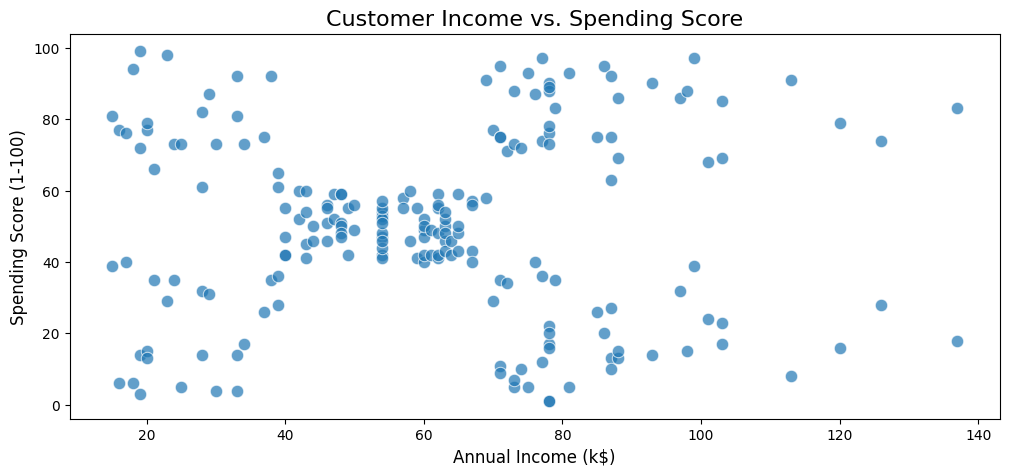

In [10]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=customer_df, x='Income', y='Spending_Score', s=80, alpha=0.7)

plt.title('Customer Income vs. Spending Score', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)

Text(0.5, 1.0, 'Distribution of Age')

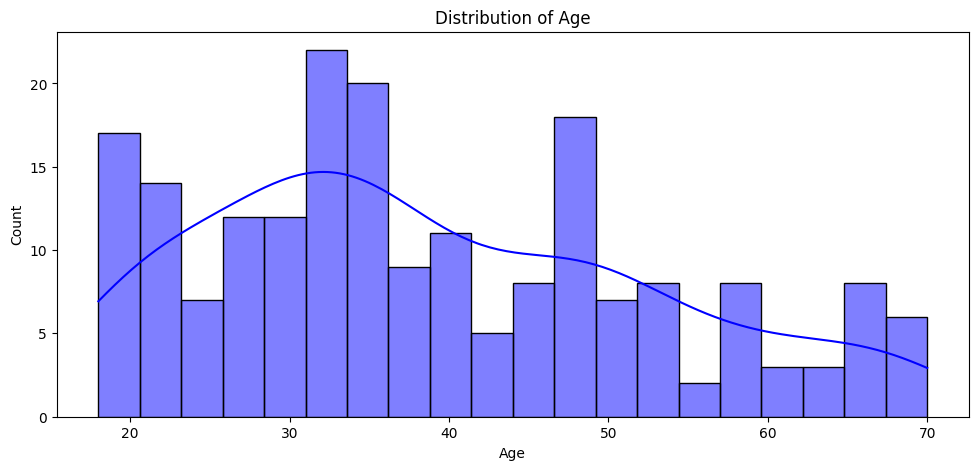

In [18]:
plt.figure(figsize=(40, 5))
plt.subplot(1, 3, 1)
sns.histplot(customer_df['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Annual Income')

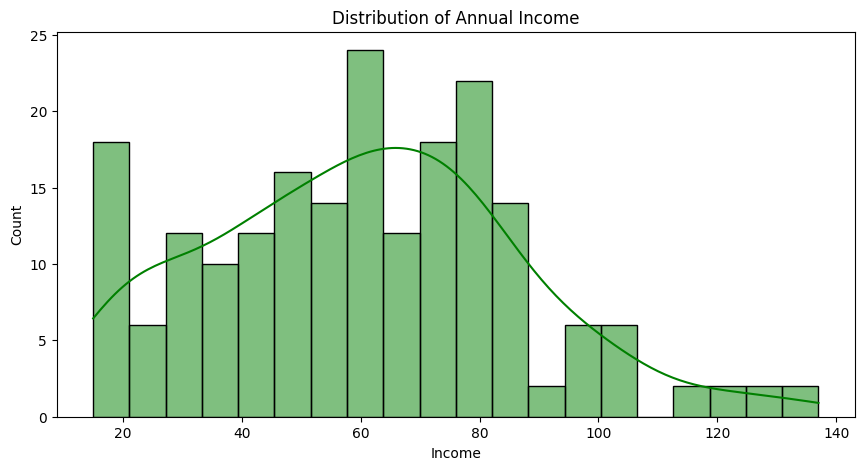

In [12]:
plt.figure(figsize=(35, 5))
plt.subplot(1, 3, 2)
sns.histplot(customer_df['Income'], bins=20, kde=True, color='green')
plt.title('Distribution of Annual Income')

Text(0.5, 1.0, 'Distribution of Spending Score')

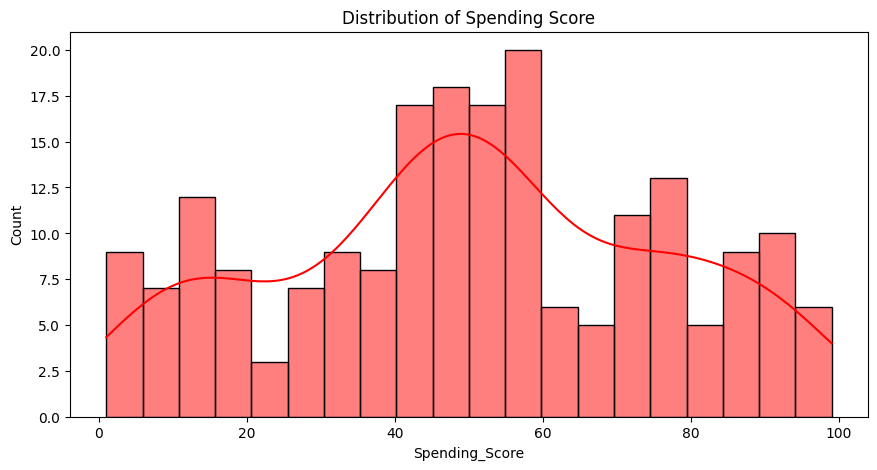

In [16]:
plt.figure(figsize=(35, 5))
plt.subplot(1, 3, 3)
sns.histplot(customer_df['Spending_Score'], bins=20, kde=True, color='red')
plt.title('Distribution of Spending Score')

Text(0, 0.5, 'Count')

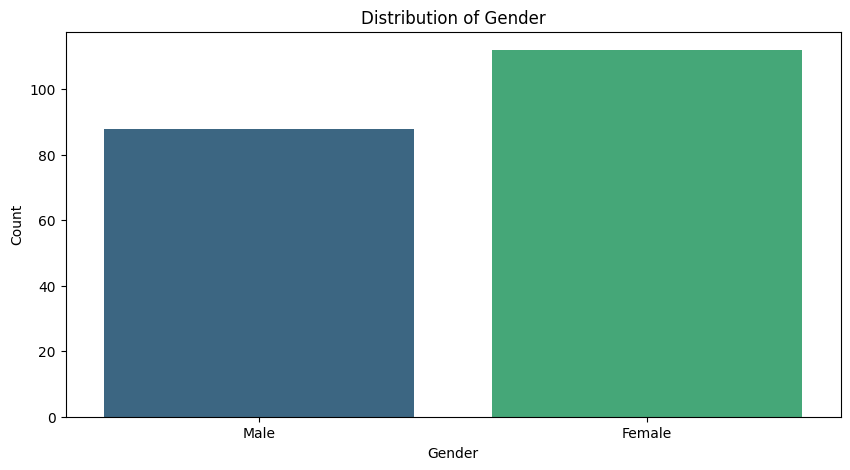

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=customer_df, x='Gender', palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


--- Plotting All Pairwise Relationships ---


Text(0.5, 1.02, 'Pairwise Relationships of Numerical Features by Gender')

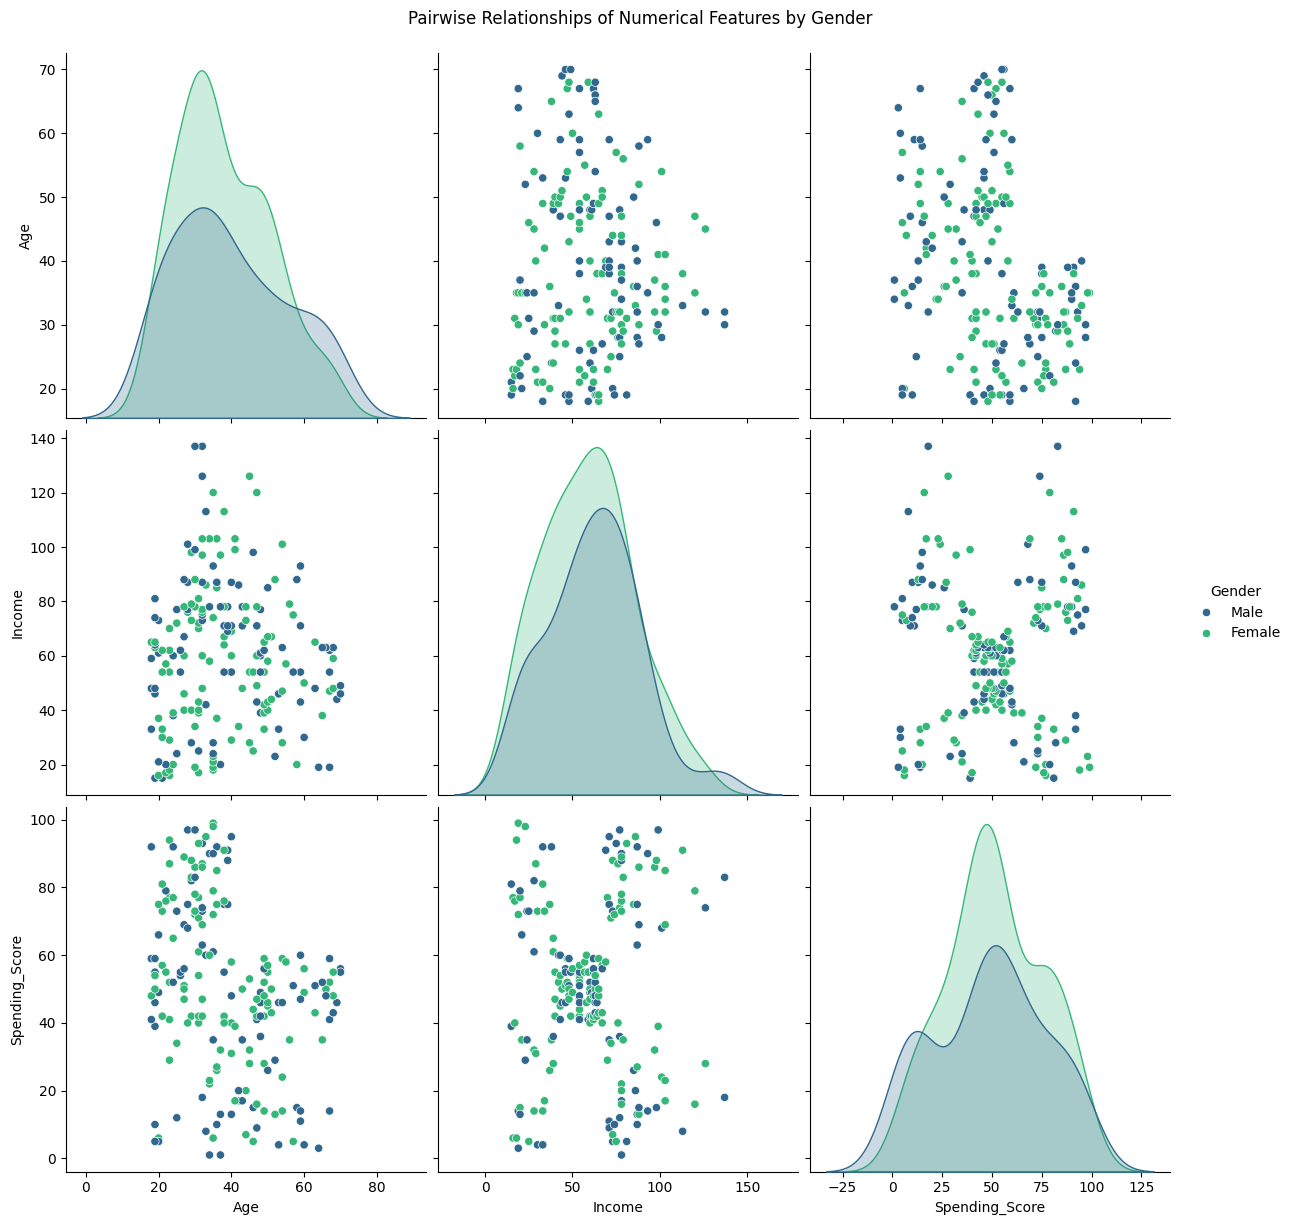

In [15]:
print("\n--- Plotting All Pairwise Relationships ---")

# We'll add 'hue="Gender"' to see if gender plays a role in the clusters
pairplot_fig = sns.pairplot(customer_df, vars=['Age', 'Income', 'Spending_Score'], hue='Gender', palette='viridis', height=4)
pairplot_fig.fig.suptitle('Pairwise Relationships of Numerical Features by Gender', y=1.02) # y=1.02 raises title

In [21]:
customer_df['Gender_Numerical'] = customer_df['Gender'].map({'Male': 0, 'Female': 1})

print("--- Converted 'Gender' to a new numerical column ---")
print(customer_df[['Gender', 'Gender_Numerical']].head())

--- Converted 'Gender' to a new numerical column ---
   Gender  Gender_Numerical
0    Male                 0
1    Male                 0
2  Female                 1
3  Female                 1
4  Female                 1


In [23]:
customer_df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Gender_Numerical
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


# **Feature Selection and scaling**

---



In [22]:
X = customer_df[['Gender_Numerical', 'Income', 'Spending_Score']]

print("\n--- Selected Features for Clustering ---")
print(X.head())


--- Selected Features for Clustering ---
   Gender_Numerical  Income  Spending_Score
0                 0      15              39
1                 0      15              81
2                 1      16               6
3                 1      16              77
4                 1      17              40


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# 1. Define which columns to scale and which to pass through

columns_to_scale = ['Income', 'Spending_Score']
columns_to_passthrough = ['Gender_Numerical']

# 2. Create the ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', columns_to_passthrough)
    ],
    remainder='drop' # This ensures no other columns accidentally get included
)

# 3. Apply the preprocessor to our data X
# We use .fit_transform() just like before, but on the preprocessor object.
X_scaled = preprocessor.fit_transform(X)

# 4. Inspect the result
# The output is a NumPy array. Let's look at the first 5 rows.
print("--- Correctly Scaled Feature Data (NumPy array, first 5 rows) ---")
print(X_scaled[:5])

# Note: The order of columns in the output array might be different.

scaled_feature_names = preprocessor.get_feature_names_out()

# Convert back to a DataFrame for clear inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=scaled_feature_names)

print("\n--- Correctly Scaled Data as a DataFrame (first 5 rows) ---")
X_scaled_df

--- Correctly Scaled Feature Data (NumPy array, first 5 rows) ---
[[-1.73899919 -0.43480148  0.        ]
 [-1.73899919  1.19570407  0.        ]
 [-1.70082976 -1.71591298  1.        ]
 [-1.70082976  1.04041783  1.        ]
 [-1.66266033 -0.39597992  1.        ]]

--- Correctly Scaled Data as a DataFrame (first 5 rows) ---


,scaler__Income,scaler__Spending_Score,passthrough__Gender_Numerical
0,-1.738999,-0.434801,0.0
1,-1.738999,1.195704,0.0
2,-1.700830,-1.715913,1.0
3,-1.700830,1.040418,1.0
4,-1.662660,-0.395980,1.0
...,...,...,...
195,2.268791,1.118061,1.0
196,2.497807,-0.861839,1.0
197,2.497807,0.923953,0.0
198,2.917671,-1.250054,0.0


# **Determining the Optimal Number of Clusters (k)**

---



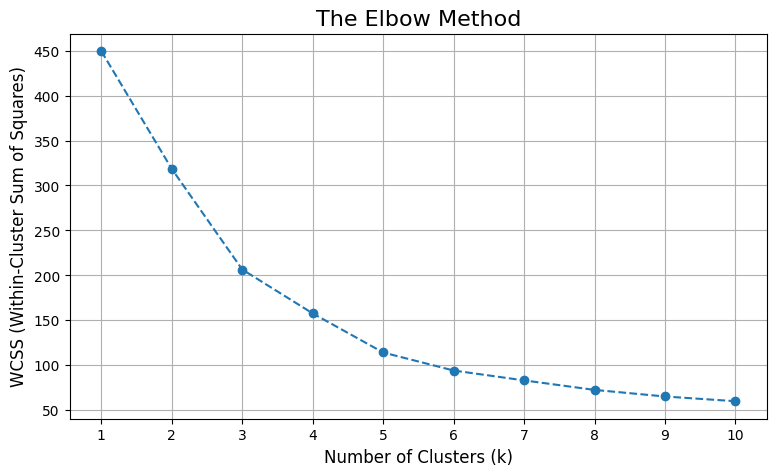

In [30]:
from sklearn.cluster import KMeans

# We will calculate the WCSS for a range of k values
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Now, let's plot the WCSS values against the number of clusters (k)
plt.figure(figsize=(9, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')

plt.title('The Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)

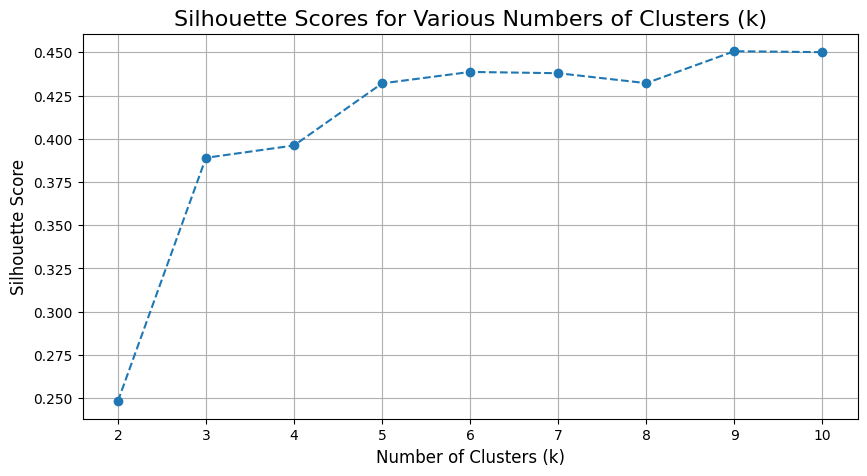

In [32]:
from sklearn.metrics import silhouette_score

# We will calculate the silhouette score for a range of k values
silhouette_scores = []
k_range = range(2, 11) # Silhouette score is not defined for k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Now, let's plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')

plt.title('Silhouette Scores for Various Numbers of Clusters (k)', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_range)
plt.grid(True)

# **Model Training and Visualization**

---



--- First 5 Rows with Cluster Assignments ---
   CustomerID  Gender  Age  Income  Spending_Score  Gender_Numerical  Cluster
0           1    Male   19      15              39                 0        0
1           2    Male   21      15              81                 0        3
2           3  Female   20      16               6                 1        0
3           4  Female   23      16              77                 1        3
4           5  Female   31      17              40                 1        0


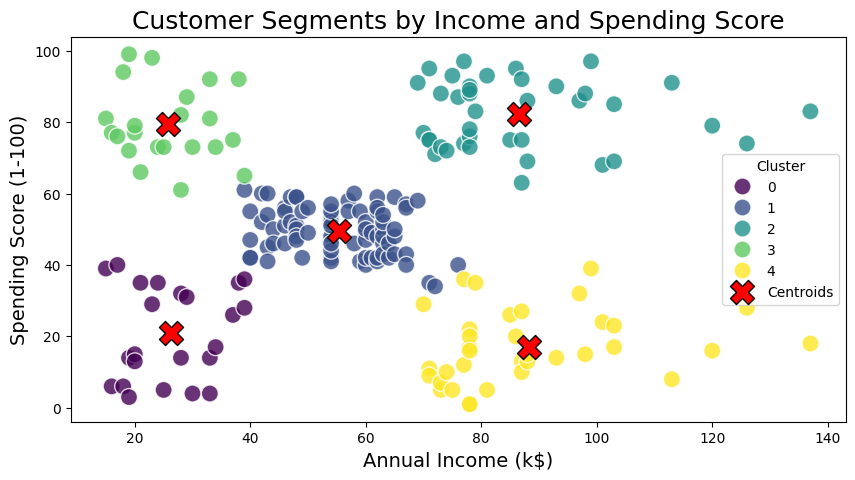

In [39]:
# 1. Model Training

# We train one final KMeans model with our optimal number of clusters.
final_kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
final_kmeans.fit(X_scaled)

# The cluster assignments for each customer are now stored in 'final_kmeans.labels_'
cluster_labels = final_kmeans.labels_

# 2. Add the Cluster Labels back to our original DataFrame

# This is crucial for analysis and interpretation.
customer_df['Cluster'] = cluster_labels

print("--- First 5 Rows with Cluster Assignments ---")
print(customer_df.head())


# 3. Visualization of the Clusters

# We will create a scatter plot, but this time, we will color the points
# based on their assigned cluster label. We will use the original 'Income'
# and 'Spending_Score' columns for this plot for easy interpretation.

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=customer_df,
    x='Income',
    y='Spending_Score',
    hue='Cluster',
    palette='viridis',
    s=150,
    alpha=0.8
)

# We will also plot the centers of each cluster (the centroids)
centroids = final_kmeans.cluster_centers_

centroids_original_scale = preprocessor.named_transformers_['scaler'].inverse_transform(
    [
        [c[0], c[1]] for c in centroids
    ]
)

centroids_scaled = final_kmeans.cluster_centers_
income_centroid_col_index = 0
score_centroid_col_index = 1

centroids_to_inverse = centroids_scaled[:, [income_centroid_col_index, score_centroid_col_index]]

# Now inverse transform
original_centroids = preprocessor.named_transformers_['scaler'].inverse_transform(centroids_to_inverse)

plt.scatter(
    original_centroids[:, 0],  # x-coordinate (Income)
    original_centroids[:, 1],  # y-coordinate (Spending_Score)
    s=300,
    c='red',
    marker='X',
    label='Centroids',
    edgecolors='black'
)

plt.title('Customer Segments by Income and Spending Score', fontsize=18)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster')

# **Cluster Profiling and Interpretation**

---



In [40]:
# --- 7. Cluster Profiling and Interpretation ---

# We will group the DataFrame by the 'Cluster' column and calculate the mean for each feature.
# This gives us the "average" customer profile for each cluster.
cluster_profile = customer_df.groupby('Cluster')[['Age', 'Income', 'Spending_Score']].mean()

# Let's also add the size of each cluster to our profile.
cluster_profile['Customer_Count'] = customer_df['Cluster'].value_counts()

# Sort the profile by a key metric, like Income, to make it easier to read.
cluster_profile = cluster_profile.sort_values(by='Income', ascending=False)

print("--- Customer Segment Profiles ---")
display(cluster_profile)

--- Customer Segment Profiles ---


,Age,Income,Spending_Score,Customer_Count
Cluster,,,,
4,41.114286,88.200000,17.114286,35
2,32.692308,86.538462,82.128205,39
1,42.716049,55.296296,49.518519,81
0,45.217391,26.304348,20.913043,23
3,25.272727,25.727273,79.363636,22


# **Saving Results**

---



In [41]:
# We want to save a file with just the CustomerID and the final cluster label.
# We will use the 'Cluster' column from our main customer_df.
kmeans_results = customer_df[['CustomerID', 'Cluster']]

# Define the filename
output_filename = 'kmeans_results.csv'

# Save to a CSV file
kmeans_results.to_csv(output_filename, index=False)

print(f"✅ K-Means clustering results have been successfully saved to '{output_filename}'.")
print("\n--- First 5 rows of the saved data ---")
print(kmeans_results.head())

✅ K-Means clustering results have been successfully saved to 'kmeans_results.csv'.

--- First 5 rows of the saved data ---
   CustomerID  Cluster
0           1        0
1           2        3
2           3        0
3           4        3
4           5        0
